<a href="https://colab.research.google.com/github/Josh-techie/AI-TPs/blob/master/Data_Cleaning/Workshop_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b>Workshop IV : Data Cleaning</b></h1></center>
<center><h3> Big data && AI </h3></center>
<center><h3>26 April 2024</h3></center>

---



# **Exercice I:**



```
# This is formatted as code
```

1. Create the following Dataframe

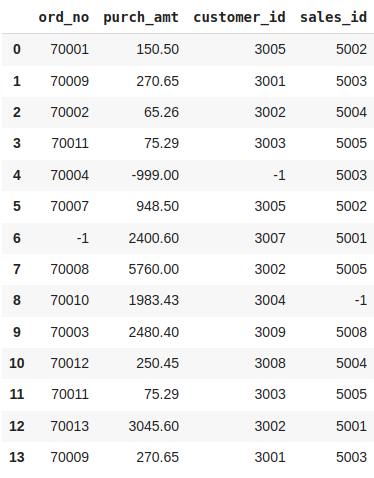

First Start of importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = {
    'ord': [70001, 70009, 70002, 70011, 70004, 70007, -1, 70008, 70010, 70003, 70012, 70011, 70013, 70009],
    'purch_amt': [150.50, 270.65, 65.26, 75.29, -999.00, 948.50, 2400.60, 5760.00, 1983.43, 2480.40, 250.45, 75.29, 3045.60, 270.65],
    'customer_id': [3005, 3001, 3002, 3003, -1, 3005, 3007, 3002, 3004, 3009, 3008, 3003, 3002, 3001],
    'sales_id': [5002, 5003, 5004, 5005, 5003, 5002, 5001, 5005, -1, 5008, 5004, 5005, 5001, 5003]
}

purchases_df = pd.DataFrame(data)
purchases_df

,ord,purch_amt,customer_id,sales_id
0,70001,150.50,3005,5002
1,70009,270.65,3001,5003
2,70002,65.26,3002,5004
3,70011,75.29,3003,5005
4,70004,-999.00,-1,5003
5,70007,948.50,3005,5002
6,-1,2400.60,3007,5001
7,70008,5760.00,3002,5005
8,70010,1983.43,3004,-1
9,70003,2480.40,3009,5008


2. Display the number of duplicate lines

In [ ]:
duplicates_lines = purchases_df.duplicated().sum()
duplicates_lines

2

3. Select all rows containing negative values.

**lt() method, which stands for "less than", to compare each element in the DataFrame with 0**

In [ ]:
# purchases_df[purchases_df < 0, any(axis=1)]
purchases_df[purchases_df.lt(0).any(axis=1)]

,ord,purch_amt,customer_id,sales_id
4,70004,-999.00,-1,5003
6,-1,2400.60,3007,5001
8,70010,1983.43,3004,-1


**Or I can use this second method which basically do the same but with condition based **

4. Replace negative values with their absolute values.

In [ ]:
# I need to find the negative values, then use abs method 💣

# here finding the negative values
mask = (purchases_df['ord'] < 0) | (purchases_df['purch_amt'] < 0) | (purchases_df['customer_id'] < 0) | (purchases_df['sales_id'] < 0)

negative_rows = purchases_df[mask]

negative_rows = negative_rows.abs()

negative_rows

,ord,purch_amt,customer_id,sales_id
4,70004,999.00,1,5003
6,1,2400.60,3007,5001
8,70010,1983.43,3004,1


5. Delete the line of index N 6.

In [ ]:
purchases_df = purchases_df.drop(6)
purchases_df

,ord,purch_amt,customer_id,sales_id
0,70001,150.50,3005,5002
1,70009,270.65,3001,5003
2,70002,65.26,3002,5004
3,70011,75.29,3003,5005
4,70004,-999.00,-1,5003
5,70007,948.50,3005,5002
7,70008,5760.00,3002,5005
8,70010,1983.43,3004,-1
9,70003,2480.40,3009,5008
10,70012,250.45,3008,5004


6. Divide the values in the ord column into the following intervals:
- 70001 to 70005
- 70006 to 70010
- 70011 to 70015

In [19]:
# Define the intervals for binning
bins = [70000, 70005, 70010, 70015]

# Define the labels for the intervals
labels = ['70001 to 70005', '70006 to 70010', '70011 to 70015']

# Create a new column 'ord_no_interval' based on the intervals
purchases_df['ord_no_interval'] = pd.cut(purchases_df['ord'], bins=bins, labels=labels, include_lowest=True)

purchases_df

,ord,purch_amt,customer_id,sales_id,ord_no_interval
0,70001,150.50,3005,5002,70001 to 70005
1,70009,270.65,3001,5003,70006 to 70010
2,70002,65.26,3002,5004,70001 to 70005
3,70011,75.29,3003,5005,70011 to 70015
4,70004,-999.00,-1,5003,70001 to 70005
5,70007,948.50,3005,5002,70006 to 70010
7,70008,5760.00,3002,5005,70006 to 70010
8,70010,1983.43,3004,-1,70006 to 70010
9,70003,2480.40,3009,5008,70001 to 70005
10,70012,250.45,3008,5004,70011 to 70015


# **Exercice II: (Inconsistent Data Entry)**

1. The first thing we will need to do is to load the libraries and the dataset that we will be using.

In [20]:
#install fuzzywuzzy and python-Levenshtein
!pip install fuzzywuzzy
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.8 MB/s eta 0:00:00


In [34]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

from google.colab import drive
drive.mount("/content/drive", force_remount=True)


# read in all our data
professors = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data-Cleaning/Workshop4/pakistan_intellectual_capital.csv')

# set seed for reproducibility
np.random.seed(0)

Mounted at /content/drive


2. Run the code below to take a look at all the unique values in the "Graduated from" column.

In [35]:
univ = professors["Graduated from"].unique()
univ

array(['Asian Institute of Technology',
       'Balochistan University of Information Technology, Engineering and Management Sciences',
       'University of Balochistan',
       "Sardar Bahadur Khan Women's University",
       'SRH Hochschule Heidelberg',
       'Institute of Business Administration,Karachi', 'DUET,Karachi',
       'University of Turbat', 'University of Vienna',
       'Monash University', 'University of Stirling',
       'Chinese Academy of Sciences', 'University of Innsbruck',
       'Vienna University of Technology', 'University of Paris-Est',
       'The University of Cambridge', 'Harbin Institute of Technology',
       'University of Nice, Sophia Antipolis', 'The University of York',
       'Galilée - Université Paris 13', 'University of Bedfordshire',
       'North Dakota State University', 'Kyungpook National University',
       'The University of Manchester',
       'National University of Sciences and Technology',
       'FAST– National University of Computer

3. Do you notice any inconsistencies in the data?
Can these inconsistencies be corrected by removing the whitespace at the beginning and end of the cells?


  * Provide an example.


Yes, the presence of whitespace at the beginning or end of cells can lead to inconsistencies in the data, especially when comparing or grouping strings.

*Example*:
  - Cell 1: 'University of Leeds'
  - Cell 2: 'University of Leeds '

To correct these inconsistencies by removing the whitespace at the beginning and end of the cells, you can use the strip() method in Python.

4. Let's now focus on cleaning up inconsistencies in the "Country" column. Display the list of unique values in this column.

In [36]:
country = professors["Country"].unique()
# display the unique country in the db
country

array(['Thailand', 'Pakistan', 'germany', 'Austria', 'Australia', 'UK',
       'China', 'France', 'USofA', 'SouthKorea', 'Malaysia', 'Sweden',
       'Italy', 'Canada', 'Norway', 'Ireland', 'New Zealand', 'Urbana',
       'Portugal', 'Russian Federation', 'USA', 'Finland', ' USA',
       'Netherland', ' Germany', ' Sweden', ' New Zealand', 'Greece',
       'Turkey', 'South Korea', 'Macau', 'Singapore', 'Spain', 'Japan',
       'HongKong', 'Saudi Arabia', 'Mauritius', 'Scotland'], dtype=object)

5. Jetez un autre coup d'œil à la colonne "Country" et voyez s'il y a des nettoyages de données que nous devons faire. Il semble que 'usa' et 'usofa' devraient être le même pays. la meme chose pour 'southkorea' et 'south korea'  Corrigez la colonne "Country" dans le dataframe pour remplacer "usofa" par "usa" et 'southkorea' par 'south korea'.
  * obtenir une liste de chaînes uniques dans la colonne.
  * obtenir les 10 correspondances les plus proches de notre chaîne d'entrée
  * selectioner seulement les matchs avec un ratio> 70
  * remplacer toutes les lignes par des correspondances proches

In [42]:
# List of coutries to correct
corrections = {'usofa': 'usa', 'southkorea': 'south korea'}

# Replace the values in the3 column "Country"
professors['Country'] = professors['Country'].replace(corrections)

# Get the 10 close correspondances to our input string
input_string = 'usa'
matches = process.extract(input_string, country, limit=10)

# Select only the matches with ratio > 70
close_matches = [match[0] for match in matches if match[1] > 70]

# Remplacer toutes les lignes par des correspondances proches
professors['Country'] = professors['Country'].apply(lambda x: process.extractOne(x, close_matches)[0])

